**Assignment**

# Task 1 - Classification
1. Use the same dataset (Iris),but try using different features/combinations of features and test the accuracy.
2. Use cross validation to compare KNN and any other classification model of your choice. Then, use GridSearch for tuning your final model. 

# Task 2 - Regression
KNN can be used for classification and regression problems. In classification problems, KNN classifies an instance by taking the majority of votes from its neighbors. In regression problems, KNN assigns the predicted value by averaging the values of its neighbors. <br>
You should use this [dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) for this task. You should do the following:
1. Do some basic data exploration (as much as you need).
2. Write down your observations and whether you needed to do any preprocessing/feature engineering.
3. Use cross validation to choose between KNN or linear regression models.
4. Compare their performance and try to justify why a model's performance is good or bad?
4. Use GridSearch CV for tuning your final model.

**Good Luck!**

**Answer**

Importing

In [ ]:
import numpy as np
import pandas as pd 

from sklearn import datasets
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from mlxtend.preprocessing import shuffle_arrays_unison

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.preprocessing import PolynomialFeatures as PF
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

Task 1

Part 1

Reading IRIS data

In [ ]:
iris= datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


Preparing data

In [ ]:
iris_x1 = iris.data[:,2:]  #Sepal
iris_x2 = iris.data[:,0:2] #Petal
iris_y1 = iris.target      #Type
iris_y2 = iris.target      #Type

Pre-processing 

In [ ]:
iris_x1, iris_y1 = shuffle_arrays_unison(arrays=[iris_x1, iris_y1], random_seed=42) 
iris_x2, iris_y2 = shuffle_arrays_unison(arrays=[iris_x2, iris_y2], random_seed=42) 

scaler = StandardScaler()
scaler.fit(iris_x1)
scaler.fit(iris_x2)
iris_x1 = scaler.transform(iris_x1)
iris_x2 = scaler.transform(iris_x2)

iris_x1_train, iris_x1_test, iris_y1_train, iris_y1_test = train_test_split(iris_x1, iris_y1, test_size=0.2, random_state=42)
iris_x2_train, iris_x2_test, iris_y2_train, iris_y2_test = train_test_split(iris_x2, iris_y2, test_size=0.2, random_state=42)

Testing the accuracy [Using Linear classification]

In [ ]:
classifier_model = LogisticRegression()
model_fit_iris_x1 = classifier_model.fit(iris_x1_train, iris_y1_train)
print("Accuracy of classification using sepal data:",str(accuracy_score(iris_y1_test, model_fit_iris_x1.predict(iris_x1_test))*100) + '%')
model_fit_iris_x2 = classifier_model.fit(iris_x2_train, iris_y2_train)
print("Accuracy of classification using petal data:",str(accuracy_score(iris_y2_test, model_fit_iris_x2.predict(iris_x2_test))*100) + '%')

Accuracy of classification using sepal data: 100.0%
Accuracy of classification using petal data: 80.0%


So sepal features (length and width) get better accuracy, so I will use them.

Part 2

Using different models

In [ ]:
model1 = LogisticRegression()
scores1 = cross_val_score(model1, iris_x1_train, iris_y1_train, cv=10, scoring='accuracy') #cv is cross validation
print("Acuuracy of cross validation using logistic regression: " + str(scores1.mean()*100) + '%')

model2 = knn()
scores2 = cross_val_score(model2, iris_x1_train, iris_y1_train, cv=10, scoring='accuracy') #cv is cross validation
print("Accuracy of cross validation using knn : " + str(scores2.mean()*100) + '%')

Acuuracy of cross validation using logistic regression: 94.16666666666667%
Accuracy of cross validation using knn : 95.83333333333333%


So, KNN get better accuracy, so I will use it.

Applying Grid search

In [ ]:
tuned_parameters = {
        'n_neighbors': range(1,30)
    }
model= knn()
model = GridSearchCV(model, tuned_parameters,cv=10,scoring='accuracy')
model.fit(iris_x1_train, iris_y1_train)
print(model.best_params_)

{'n_neighbors': 1}


Applying KNN

In [ ]:
knn_model = knn(n_neighbors=1)
knn_model_fit = knn_model.fit(iris_x1_train, iris_y1_train)
print("Accuracy:", str(accuracy_score(iris_y1_test, model.predict(iris_x1_test))*100) + '%')

Accuracy: 100.0%


Task 2

Part 1

Reading data

In [ ]:
#train data (x and y)
data_df = pd.read_csv('train.csv', index_col = 0)
data_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


Some explorations

Data dimentions (shape)

In [ ]:
data_df.shape

(1460, 80)

Data descrition

In [ ]:
data_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Data information

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Information about null data

In [ ]:
data_df_null = data_df.isnull().sum()
data_df_null[data_df_null > 0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Correlation all features with sale price

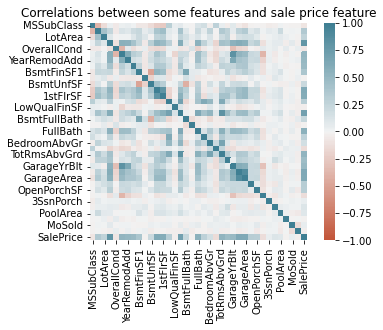

In [ ]:
sns.heatmap(
    data_df.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
plt.title("Correlations between some features and sale price feature")
plt.show()

Part 2

Pre-processing

Pre-processing data

In [ ]:
features_names = data_df.select_dtypes(exclude = ["object"]).columns
data_no_null_df = data_df[features_names].fillna(data_df[features_names].median())
features_names_other =  data_df.select_dtypes(include = ["object"]).columns
other_df = pd.get_dummies(data_df[features_names_other])
final_data_df = pd.concat([data_no_null_df, other_df],axis = 1)
final_data_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0


Preparing data

In [ ]:
y = final_data_df['SalePrice'].to_numpy()
x = final_data_df.drop('SalePrice',axis =1).to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Part 3 and part 4

Cross validation Using models

Linear regression

In [ ]:
#Linear regression
model = LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_absolute_error') #cv is cross validation
model = model.fit(x_train, y_train)

In [ ]:
#printing
print("Mean of scores:",scores.mean())
print("Mean absolute error:",mae(y_test, model.predict(x_test)))

Mean of scores: -21365.40599396053
Mean absolute error: 21151.276749862212


KNN

In [ ]:
#KNN
model = knn()
scores = cross_val_score(model, x_train, y_train, cv=10, scoring='neg_mean_absolute_error') #cv is cross validation
model = model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
#printing
print("Mean of scores:",scores.mean())
print("Mean absolute error:",mae(y_test, model.predict(x_test)))

Mean of scores: -47854.28911730032
Mean absolute error: 47221.6301369863


So, The KNN has mean absolute error higher than linear regression, so linear regression is better.

Part 5

Applying Grid search

In [ ]:
tuned_parameters = {
        'n_neighbors': range(1,100)
    }
model= knn()
model = GridSearchCV(model, tuned_parameters,cv=10, scoring= 'neg_mean_absolute_error')
model.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100)},
             scoring='neg_mean_absolute_error')

In [ ]:
print(model.best_params_)

{'n_neighbors': 2}


Applying KNN

In [ ]:
knn_model = knn(n_neighbors=1)
knn_model_fit = knn_model.fit(x_train, y_train)
print("Mean absolute error:", mae(y_test, model.predict(x_test)))

Mean absolute error: 36560.51369863014
